In [49]:
### MSCA 37010 Project
### Diamond Data Analysis and Visualization

In [13]:
import pandas as pd
import numpy as np

In [14]:
Diamond_data = pd.read_csv('C:\\Users\\vamsh\\Documents\\Uni\\UChicago\\Autumn 2022\\MSCA 37010_5 - Programming for Analytics\\Project\\Diamonds.csv', encoding = 'gbk', header = 0)

In [15]:
#### Cleaning of Data ####
Diamond_data.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [16]:
# Dropping column 'Unnamed: 0' as we already have an Index
Diamond_data.drop(['Unnamed: 0'] , axis=1 , inplace=True)
Diamond_data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [17]:
# Checking to see there no NaN values
Diamond_data.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [18]:
# As per the min values from last stpe we see there some rows (20) that have 0 x, y, z dimensions
len(Diamond_data[(Diamond_data['x']==0) | (Diamond_data['y']==0) | (Diamond_data['z']==0)])

20

In [19]:
# Dropping Rows with a zero Dimensions.
Diamond_data = Diamond_data[(Diamond_data[['x','y','z']] != 0).all(axis=1)]

In [20]:
#### Correlation Analysis ####

C:\Users\vamsh\AppData\Local\Temp\ipykernel_20548\118447818.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = Diamond_data.corr()


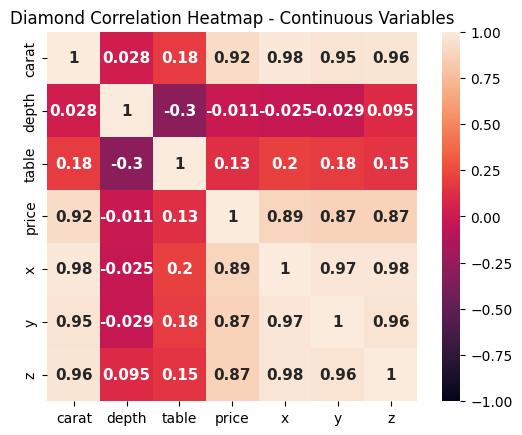

In [21]:
# Correlation Heatmap - Continuous Variables
import seaborn as sns
import matplotlib.pyplot as plt
corr = Diamond_data.corr()
sns.heatmap(data=corr, square=True , annot=True, vmin=-1, vmax=1,
            annot_kws={'fontsize':11, 'fontweight':'bold'}, cbar=True)
plt.title('Diamond Correlation Heatmap - Continuous Variables')
plt.show()

In [22]:
'''
The Price of the Diamond is highly correlated to it's Carat (Weight not size)
and its Dimension Attributes. Dimension being Length(x) , Width(y) and Height(z) of the rock.
The Weight (Carat) of a diamond has the most significant impact on its Price.
This makes sense since the larger the rock is more unique it is.
Interestingly Depth is inversely related to Price.
'''

"\nThe Price of the Diamond is highly correlated to it's Carat (Weight not size)\nand its Dimension Attributes. Dimension being Length(x) , Width(y) and Height(z) of the rock.\nThe Weight (Carat) of a diamond has the most significant impact on its Price.\nThis makes sense since the larger the rock is more unique it is.\nInterestingly Depth is inversely related to Price.\n"

In [23]:
# Dealing with categorical variables colour, cut and clarity
# The columns cut, clarity and colour have non numerical entries.
# Using Dummy Variables these categorical variables are replaced by the numeric values
Diamond_data_model=Diamond_data.replace({'color' : { 'D' : 6, 'E' : 5, 'F' : 4, 'G' : 3, 'H': 2, 'I':1, 'J':0}})
Diamond_data_model=Diamond_data_model.replace({'cut': {'Ideal':4, 'Premium': 3,'Very Good':2, 'Good':1 ,'Fair':0}})
Diamond_data_model=Diamond_data_model.replace({'clarity': {"IF": 8, 'VVS1' :7, 'VVS2': 6, 'VS1': 5, 'VS2': 4, 'SI1':3, 'SI2': 2, 'I1':0}})
Diamond_data_model.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,4,5,2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,5,3,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,5,5,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,1,4,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,0,2,63.3,58.0,335,4.34,4.35,2.75


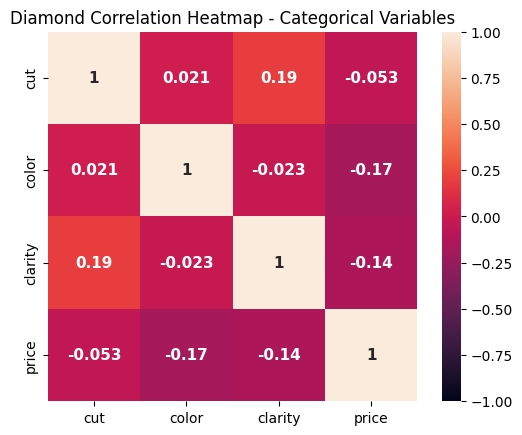

In [24]:
# Correlation Heatmap - Categorical Variables
import seaborn as sns
import matplotlib.pyplot as plt
df = Diamond_data_model.drop(['carat','depth','table','x','y','z'], axis=1)
corr = df.corr()
sns.heatmap(data=corr, square=True , annot=True, vmin=-1, vmax=1,
            annot_kws={'fontsize':11, 'fontweight':'bold'}, cbar=True)
plt.title('Diamond Correlation Heatmap - Categorical Variables')
plt.show()

In [25]:
# Cut vs Price

In [26]:
import matplotlib.pyplot as plt

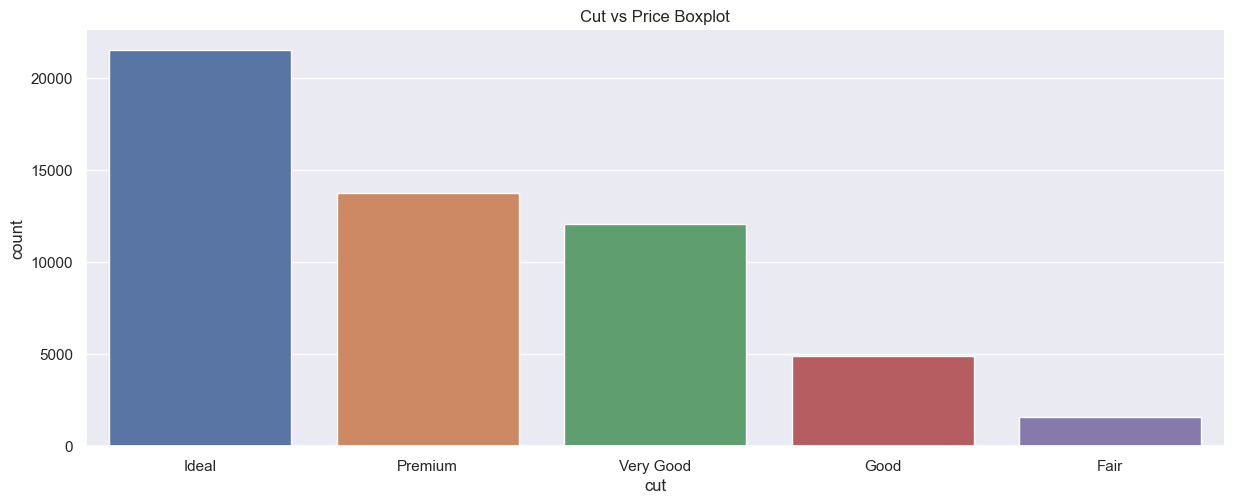

In [36]:
# Histogram
cut_order = ['Ideal','Premium','Very Good','Good','Fair']
sns.catplot(x='cut', data=Diamond_data , kind='count',aspect=2.5,order = cut_order)
plt.title('Cut vs Price Boxplot') 
plt.show()

In [25]:
# Color vs Price

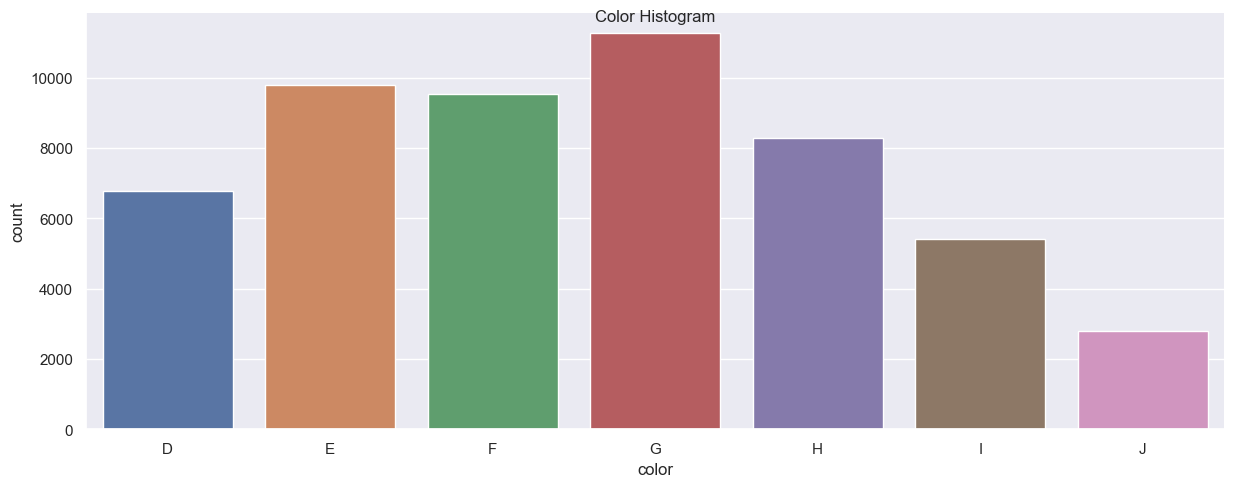

In [37]:
# Histogram
color_order = ['D','E','F','G','H','I','J']
sns.catplot(x='color', data=Diamond_data , kind='count',aspect=2.5,order=color_order)
plt.title('Color Histogram', x=0.5, y=0.96) 
plt.show()

In [ ]:
# Clarity vs Price

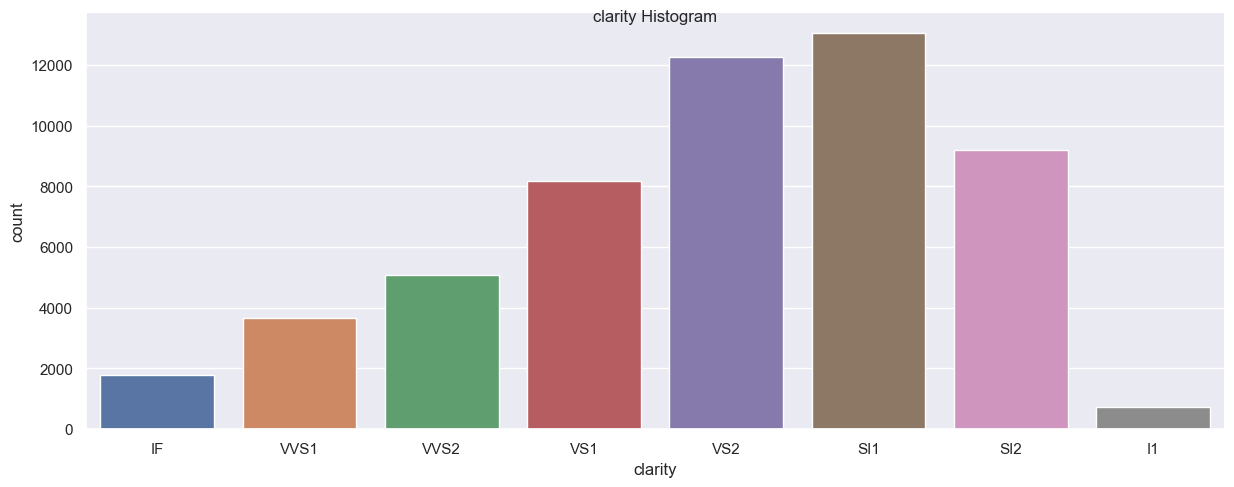

In [38]:
# Histogram
clarity_order = ['IF','VVS1','VVS2','VS1','VS2','SI1','SI2','I1']
sns.catplot(x='clarity', data=Diamond_data , kind='count',aspect=2.5,order=clarity_order)
plt.title('clarity Histogram', x=0.5, y=0.96) 
plt.show()

In [31]:
'''
It's well known that the diamonds weight or carat is a big factor to determine the diamonds price.
As can be seen in the earlier graphs between carat weight and price.
However, there are other factors that influence the price of a diamond which will be explored now.
'''

"\nIt's well known that the diamonds weight or carat is a big factor to determine the diamonds price.\nAs can be seen in the earlier grahps between carat weight and price.\nHowever there are other factors that influence the price of a diamond which will be explored now.\n"

In [32]:
# Price vs. Carat and Clarity

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

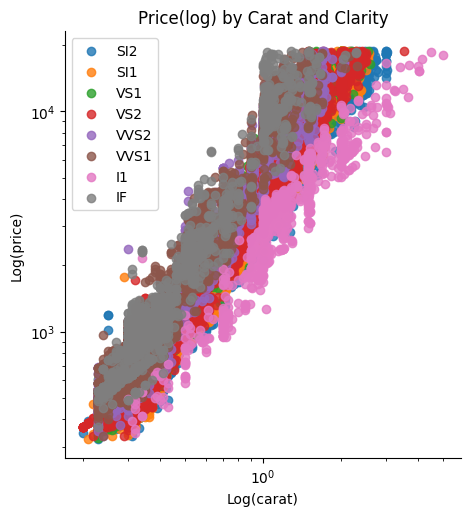

In [41]:
# Using the 'hue' argument to provide a categorical variable
fig = sns.lmplot( x='carat', y='price', data=Diamond_data, fit_reg=False, hue='clarity', legend=False)
fig.set(xscale="log", yscale="log")

# Moving the legend to an empty part of the plot
plt.legend(loc='upper left')
plt.ylabel('Log(price)')
plt.xlabel('Log(carat)')
plt.title('Price(log) by Carat and Clarity')
plt.show()

In [37]:
'''
This scatterplot shows that clarity explains some of the change in price because it's clear 
that diamonds with Clarity “IF” are the most expensive whereas “I1” are the least expensive 
clarity type. 
Therefore, when we hold carat weight constant, we see that diamonds with lower clarity are 
almost always cheaper than diamonds with better clarity. Clarity explains a lot of the 
variance found in price.
'''

"\nThis scatterplot shows that clarity explains some of the change in price because it's clear \nthat diamonds with Clarity “IF” are the most expensive whereas “I1” are the least expensive \nclarity type. \nTherefore when we hold carat weight constant, we see that diamonds with lower clarity are \nalmost always cheaper than diamonds with better clarity. Clarity explains a lot of the \nvariance found in price.\n"

In [38]:
# Price vs. Carat and Cut

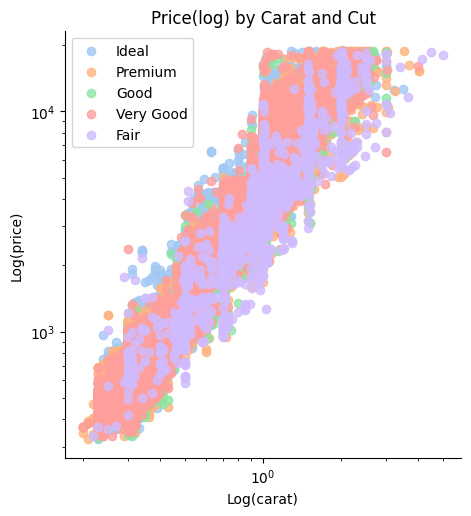

In [42]:
# Using the 'hue' argument to provide a categorical variable
fig = sns.lmplot( x='carat', y='price', data=Diamond_data, fit_reg=False, hue='cut', legend=False,
                 palette="pastel")
fig.set(xscale="log", yscale="log")

# Moving the legend to an empty part of the plot
plt.legend(loc='upper left')
plt.ylabel('Log(price)')
plt.xlabel('Log(carat)')
plt.title('Price(log) by Carat and Cut')
plt.show()

In [41]:
'''
This scatterplot shows that cut doesn't account for much of the variance in price like clarity did.
Keeping carat constant, we see some of the "fair" cuts at the bottom, some of the "very good"
in the middle, and the "ideal" cuts at the top. But the division between these categories 
isn't as clear as it was for clarity.
'''

'\nThis scatterplot shows that cut doesn\'t account for much of the variance in price like clarity did.\nKeeping carat constant we see some of the "fair" cuts at the bottom, some of the "very good"\nin the middle, and the "ideal" cuts at the top. But the division between these categories \nisn\'t as clear as it was for clarity.\n'

In [42]:
# Price vs. Carat and Color

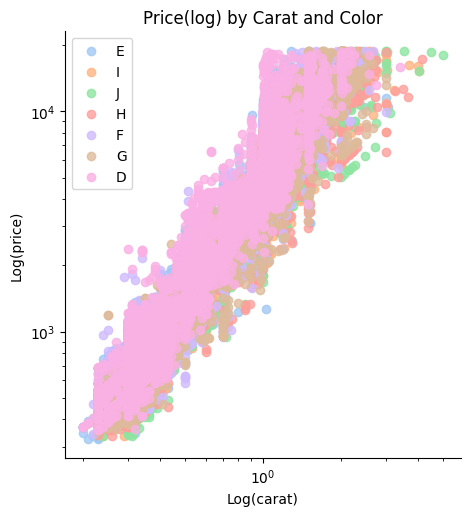

In [43]:
# Using the 'hue' argument to provide a categorical variable
fig = sns.lmplot( x='carat', y='price', data=Diamond_data, fit_reg=False, hue='color', legend=False,
                 palette="pastel")
fig.set(xscale="log", yscale="log")

# Moving the legend to an empty part of the plot
plt.legend(loc='upper left')
plt.ylabel('Log(price)')
plt.xlabel('Log(carat)')
plt.title('Price(log) by Carat and Color')
plt.show()

In [44]:
'''
This scatterplot shows that color accounts for a significant portion of the variance in price.
Keeping carat size constant, we see a clear division on the various diamond color categories 
like what we saw for clarity. Therefore, diamond color does have a clear influence on price.
'''

'\nThis scatterplot shows that color accounts for a signigicant portion of the variance in price.\nKeeping carat size constant we see a clear division on the various diamond color categories \nsimilar to what we saw for clarity. Therefore diamond color does have a clear influence on price.\n'

In [45]:
# Linear Regression Model

In [79]:
#Defining the independent (x) and dependent (y) variables
y= Diamond_data_model['price']
x= Diamond_data_model.drop(['price'], axis=1)

In [80]:
# Split data into training and testing dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.2)

# Generating the Linear Regression Model
from sklearn.linear_model import LinearRegression
Diamond_model = LinearRegression()

# Fitting the Training Data to the Model
Diamond_model.fit(x_train,y_train)

# Use the newly fitted model to predict the values for the independent variables
# using the Testing Dataset
y_prediction =  Diamond_model.predict(x_test)

In [81]:
# Output the Model Coefficients and Regression Model Equation
b0= Diamond_model.intercept_
b1= Diamond_model.coef_
print(" Equation of the regression line is \n y_est= {} + {}x1 + {}x2 + {}x3 + {}x4 + {}x5 + {}x6 + {}x7 + {}x8 + {}x9".format(b0,b1[0], b1[1], b1[2], b1[3], b1[4], b1[5], b1[6], b1[7], b1[8]))


 Equation of the regression line is 
 y_est= 3295.1342443607637 + 10988.499068028696x1 + 120.28521916181171x2 + 323.9405306122084x3 + 501.8655092484547x4 + -76.73541581584236x5 + -24.81260325243153x6 + -950.1636948597597x7 + 51.27027339083918x8 + -83.45505957184434x9


In [82]:
# Obtain the R-Squared value for the Model
# r_squared value is  0.9089588877559717
print("r_squared value is ", Diamond_model.score(x,y))

r_squared value is  0.9091109038110495


In [83]:
# Get all the above using the Statsmodel instead of Scikit-Learn python Module
# Both use the OLS (Ordinary Least Squares) method to estimate the unknown parameters in the model.
import statsmodels.api as sm
x_new = sm.add_constant(x) #This is the intercept that has to be added to create the model
Diamond_model_New = sm.OLS(y, x_new) # create the model
fitted_Model = Diamond_model_New.fit() #fit the model
fitted_Model.summary() # Obtain the results of regression

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                 5.992e+04
Date:                Tue, 29 Nov 2022   Prob (F-statistic):               0.00
Time:                        15:32:04   Log-Likelihood:            -4.5890e+05
No. Observations:               53920   AIC:                         9.178e+05
Df Residuals:                   53910   BIC:                         9.179e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3293.4531    427.918      7.696      0.000    2454.731    4132.176
carat       1.098e+04     54.438    201.620      0.000    1.09e+04    1.11e+04
cut          116.2978      5.649     20.588      0.000     105.226     127.370
color        324.1797      3.221    100.656      0.000     317.867     330.492
clarity      504.6171      3.428    147.214      0.000     497.899     511.336
depth        -76.0046      4.861    -15.636      0.000     -85.532     -66.478
table        -25.9939      2.914     -8.921      0.000     -31.705     -20.283
x           -933.2282     37.087    -25.163      0.000   -1005.920    -860.537
y             54.6617     20.677      2.644      0.008      14.135      95.189
z           -105.9644     40.323     -2.628      0.009    -184.998     -26.931
==============================================================================
Omnibus:                    12248.543   Durbin-Watson:                   1.159
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           646578.694
Skew:                          -0.069   Prob(JB):                         0.00
Kurtosis:                      19.964   Cond. No.                     7.04e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.04e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""